In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("http://bit.ly/w-data")
print(df)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


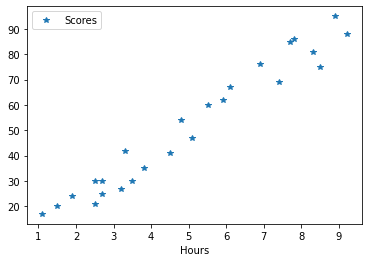

In [5]:
df.plot(x="Hours",y="Scores",style='*')
plt.title=('Plotting the Regression line')
plt.show()

In [6]:
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

In [8]:
print(X.shape)

(25, 1)


In [9]:
print(y.shape)

(25,)


In [10]:
#divide  the data into train and test detaset

from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [11]:
#fitting linear regression into the training set

from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)

LinearRegression()

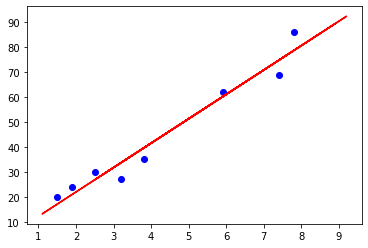

In [14]:
#visualising the testing data

plt.scatter(x_test,y_test,color='blue')
plt.plot(X_train,linear_regression.predict(X_train),color='red')
plt.show()

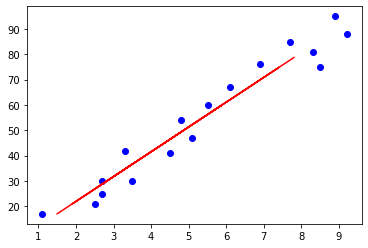

In [57]:
#visualising the training data

plt.scatter(X_train,y_train,color='blue')
plt.plot(X_test,linear_regression.predict(X_test),color='red')
plt.show()

In [43]:
#predict the test set result
y_pred = linear_regression.predict(X_test)
y_pred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

In [45]:
#comparing the Actual and Predicted Value (in tabular form)

df=pd.DataFrame({'Actual Value': y_test,'Predicted Value': y_pred})
df

,Actual Value,Predicted Value
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [46]:
#Estimating  training and test score

print("training Score : ",linear_regression.score(X_train,y_train))
print("testing Score : ",linear_regression.score(X_test,y_test))

training Score :  0.9484997422695115
testing Score :  0.9568211104435257


In [48]:
#pridected Score if student studies for 9.25 hrs/day

hrs = [9.25]
ans = linear_regression.predict([hrs])
print("Hours Student study = {}".format(hrs))
print("Predicted Score of student = {}".format(ans[0]))

Hours Student study = [9.25]
Predicted Score of student = 92.91505723477056


In [49]:
#finding the residuals: it is very important to calculate the perfomance of the model

from sklearn import metrics

print('Mean Absolute Error:- ',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Square Error:- ',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squred Error:- ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error:-  4.419727808027652
Mean Square Error:-  22.96509721270043
Root Mean Squred Error:-  4.792191274636315
